<a href="https://www.kaggle.com/code/coderpulkits/comparison-of-rnn-lstm-embeddings?scriptVersionId=199785632" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv


**Processing the Data**

In [2]:
df = pd.read_csv("/kaggle/input/sentimental-analysis-for-tweets/sentiment_tweets3.csv")
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [3]:
df.shape

(10314, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [5]:
df.drop('Index', axis=1, inplace=True)
df.head()

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout

In [7]:
# test data
y = df['label (depression result)']
test_size = len(y)

y

0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label (depression result), Length: 10314, dtype: int64

**Converting the Textual Data in Numeric Data**

In [8]:
tokenizer = Tokenizer(oov_token="<nothing>")

tokenizer.fit_on_texts(df['message to examine'])

In [9]:
tokenizer.document_count

10314

In [10]:
# this denotes a map where index of every word is given 
len(tokenizer.word_index)

23196

In [11]:
# this is the unique number of words present in the data
vocab = len(tokenizer.word_index)
vocab

23196

In [12]:
sequences = tokenizer.texts_to_sequences(df['message to examine'])

sequences_padded = pad_sequences(sequences, padding = "post")
sequences_padded

array([[  22,   91,    5, ...,    0,    0,    0],
       [  11,  547, 7068, ...,    0,    0,    0],
       [3570,   27,  176, ...,    0,    0,    0],
       ...,
       [2493, 4496, 2321, ...,    0,    0,    0],
       [ 316, 1804,    5, ...,    0,    0,    0],
       [ 659,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [13]:
sequences_padded.shape

(10314, 102)

In [14]:
timestamp = len(sequences_padded[0])
timestamp

102

In [15]:
# to find the last word index of the longest tweet
def lastWordIndexes(arr):
    n = len(arr[0])
    size = len(arr)
    lastWords = []
    for i in range(size):
        if(arr[i][n-1]!=0):
            lastWords.append(i)
    return lastWords

In [16]:
# this indicates the row no of the tweets which have the longest length
# here we only have one tweet which is the longest
lastWords = lastWordIndexes(sequences_padded)
lastWords

[9410]

In [17]:
# test train data split

X_train, X_test, y_train, y_test = train_test_split(sequences_padded,y,test_size = 0.2, random_state = 42)

**This is the RNN Model**

In [18]:
# RNN model without embedding

modelRNN = Sequential()

# 32*1 weights + 32*32 hidden weights + 32 bias = 1088
modelRNN.add(SimpleRNN(128, input_shape = (timestamp, 1), activation="tanh"))
# 1*32 weights + 1 bias = 33
modelRNN.add(Dense(1, activation="sigmoid"))

modelRNN.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# model compile
modelRNN.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

historyRNN = modelRNN.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7400 - loss: 0.5627 - val_accuracy: 0.7824 - val_loss: 0.5242
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7639 - loss: 0.5502 - val_accuracy: 0.7824 - val_loss: 0.5260
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7786 - loss: 0.5316 - val_accuracy: 0.7824 - val_loss: 0.5277
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7801 - loss: 0.5303 - val_accuracy: 0.7824 - val_loss: 0.5388
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7691 - loss: 0.5425 - val_accuracy: 0.7824 - val_loss: 0.5251
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7795 - loss: 0.5297 - val_accuracy: 0.7824 - val_loss: 0.5239
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7788 - loss: 0.5308 - val_accuracy: 0.7824 - val_loss: 0.5311
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7673 - loss: 0.5431 - val_accu

**RNN with Embeddings**

In [20]:
modelRNNEmb = Sequential()

# output dim = 3 embeddings per word
modelRNNEmb.add(Embedding(vocab+1, 3, input_shape = (timestamp,)))
modelRNNEmb.add(SimpleRNN(128, activation="tanh"))
modelRNNEmb.add(Dense(1, activation = "sigmoid"))

modelRNNEmb.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 102, 3)         │        69,591 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,616 (338.34 KB)

 Trainable params: 86,616 (338.34 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
modelRNNEmb.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

historyRNNEmb = modelRNNEmb.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7640 - loss: 0.5544 - val_accuracy: 0.7824 - val_loss: 0.5241
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7805 - loss: 0.5293 - val_accuracy: 0.7824 - val_loss: 0.5367
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7720 - loss: 0.5382 - val_accuracy: 0.7824 - val_loss: 0.5241
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7692 - loss: 0.5425 - val_accuracy: 0.7824 - val_loss: 0.5239
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7788 - loss: 0.5345 - val_accuracy: 0.7824 - val_loss: 0.5238
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7585 - loss: 0.5677 - val_accuracy: 0.7819 - val_loss: 0.5250
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7673 - loss: 0.5460 - val_accuracy: 0.7819 - val_loss: 0.5273
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7831 - loss: 0.5302 - val_acc

**This is the LSTM Model**

In [22]:
modelLSTM = Sequential()

modelLSTM.add(LSTM(128, activation = "tanh", input_shape = (timestamp,1)))
modelLSTM.add(Dense(1, activation = "sigmoid"))

modelLSTM.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
modelLSTM.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

historyLSTM = modelLSTM.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.7919 - loss: 0.4900 - val_accuracy: 0.8429 - val_loss: 0.3996
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.8422 - loss: 0.3890 - val_accuracy: 0.8294 - val_loss: 0.4008
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.8357 - loss: 0.3818 - val_accuracy: 0.8575 - val_loss: 0.3721
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.8501 - loss: 0.3627 - val_accuracy: 0.8429 - val_loss: 0.3545
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 24s 93ms/step - accuracy: 0.8539 - loss: 0.3388 - val_accuracy: 0.8536 - val_loss: 0.3508
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.8628 - loss: 0.3193 - val_accuracy: 0.8682 - val_loss: 0.3171
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.8635 - loss: 0.3204 - val_accuracy: 0.8371 - val_loss: 0.3608
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.8718 - loss: 0.3034 - 

**LSTM with Embeddings**

In [24]:
modelLSTMEmb = Sequential()

# output dim = 3 embeddings per word
modelLSTMEmb.add(Embedding(vocab+1, 3, input_shape = (timestamp,)))
modelLSTMEmb.add(LSTM(128, activation="tanh"))
modelLSTMEmb.add(Dense(1, activation = "sigmoid"))

modelRNNEmb.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 102, 3)         │        69,591 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,850 (1015.04 KB)

 Trainable params: 86,616 (338.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 173,234 (676.70 KB)

In [25]:
modelLSTMEmb.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

historyLSTMEmb = modelLSTMEmb.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - accuracy: 0.7669 - loss: 0.5725 - val_accuracy: 0.7824 - val_loss: 0.5239
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.7786 - loss: 0.5308 - val_accuracy: 0.7824 - val_loss: 0.5243
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.7771 - loss: 0.5329 - val_accuracy: 0.7824 - val_loss: 0.5281
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7802 - loss: 0.5287 - val_accuracy: 0.7824 - val_loss: 0.5241
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.7702 - loss: 0.5405 - val_accuracy: 0.7824 - val_loss: 0.5249
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.7797 - loss: 0.5282 - val_accuracy: 0.7824 - val_loss: 0.5239
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.7744 - loss: 0.5353 - val_accuracy: 0.7824 - val_loss: 0.5241
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7790 - loss: 0.5289 - 

In [26]:
# contains 4 metrics
# accuracy, loss
# validation accuracy, validation loss

historyLSTMEmb.history

{'accuracy': [0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055,
  0.7739667892456055],
 'loss': [0.5451319813728333,
  0.5368098616600037,
  0.5365390181541443,
  0.5357352495193481,
  0.5356784462928772,
  0.5353447794914246,
  0.5353778004646301,
  0.5350939631462097,
  0.5353131294250488,
  0.5348535776138306],
 'val_accuracy': [0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873,
  0.782355785369873],
 'val_loss': [0.5239093899726868,
  0.5243468880653381,
  0.5281304121017456,
  0.524064838886261,
  0.524919867515564,
  0.5239171981811523,
  0.5241471529006958,
  0.5260785222053528,
  0.5252423286437988,
  0.5239505767822266]}

**Comparison of Various Models**

In [27]:
import matplotlib.pyplot as plt

**Training Data Accuracy**

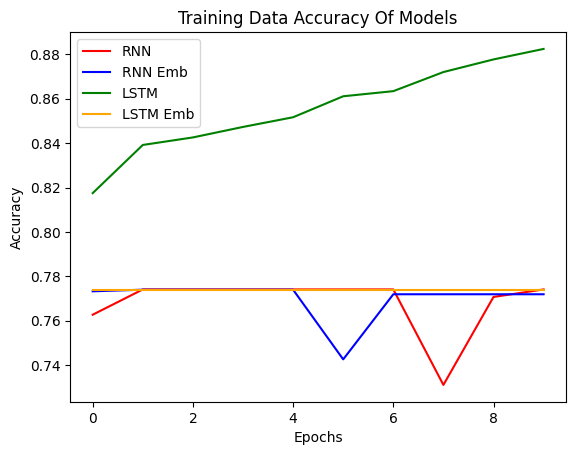

In [28]:
# Training Data Accuracy

plt.title("Training Data Accuracy Of Models")

plt.plot(historyRNN.history['accuracy'], color='red',label='RNN')
plt.plot(historyRNNEmb.history['accuracy'], color='blue',label='RNN Emb')
plt.plot(historyLSTM.history['accuracy'], color='green',label='LSTM')
plt.plot(historyLSTMEmb.history['accuracy'], color='orange',label='LSTM Emb')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()

**Validation Data Accuracy**

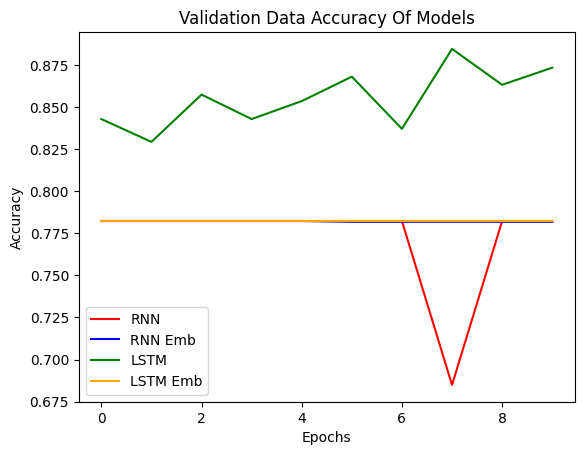

In [29]:
# Validation Data Accuracy

plt.title("Validation Data Accuracy Of Models")

plt.plot(historyRNN.history['val_accuracy'], color='red',label='RNN')
plt.plot(historyRNNEmb.history['val_accuracy'], color='blue',label='RNN Emb')
plt.plot(historyLSTM.history['val_accuracy'], color='green',label='LSTM')
plt.plot(historyLSTMEmb.history['val_accuracy'], color='orange',label='LSTM Emb')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()

**Training Data Loss**

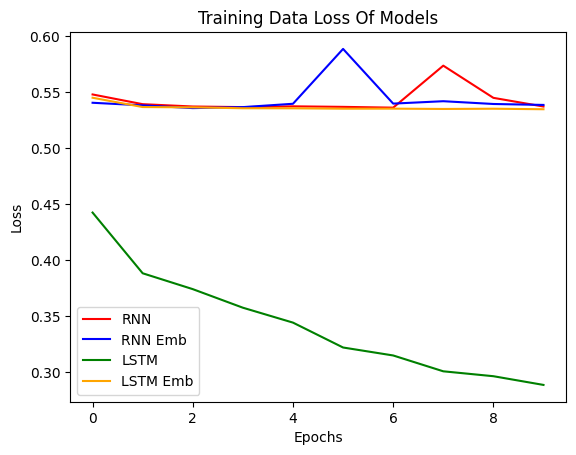

In [30]:
# Traning Data Loss

plt.title("Training Data Loss Of Models")

plt.plot(historyRNN.history['loss'], color='red',label='RNN')
plt.plot(historyRNNEmb.history['loss'], color='blue',label='RNN Emb')
plt.plot(historyLSTM.history['loss'], color='green',label='LSTM')
plt.plot(historyLSTMEmb.history['loss'], color='orange',label='LSTM Emb')

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

**Validation Data Loss**

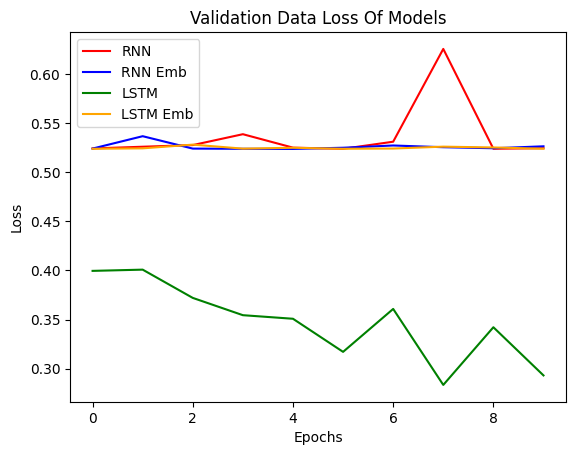

In [31]:
# Validation Data Loss

plt.title("Validation Data Loss Of Models")

plt.plot(historyRNN.history['val_loss'], color='red',label='RNN')
plt.plot(historyRNNEmb.history['val_loss'], color='blue',label='RNN Emb')
plt.plot(historyLSTM.history['val_loss'], color='green',label='LSTM')
plt.plot(historyLSTMEmb.history['val_loss'], color='orange',label='LSTM Emb')

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()